# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<strong>Изучим общую информацию, полученную о датафрейме. </strong>

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<strong>В нашем датафрейме 22 столбца и 23699 строк. </strong>

<strong>Построим гистограммы для каждого столбца</strong>

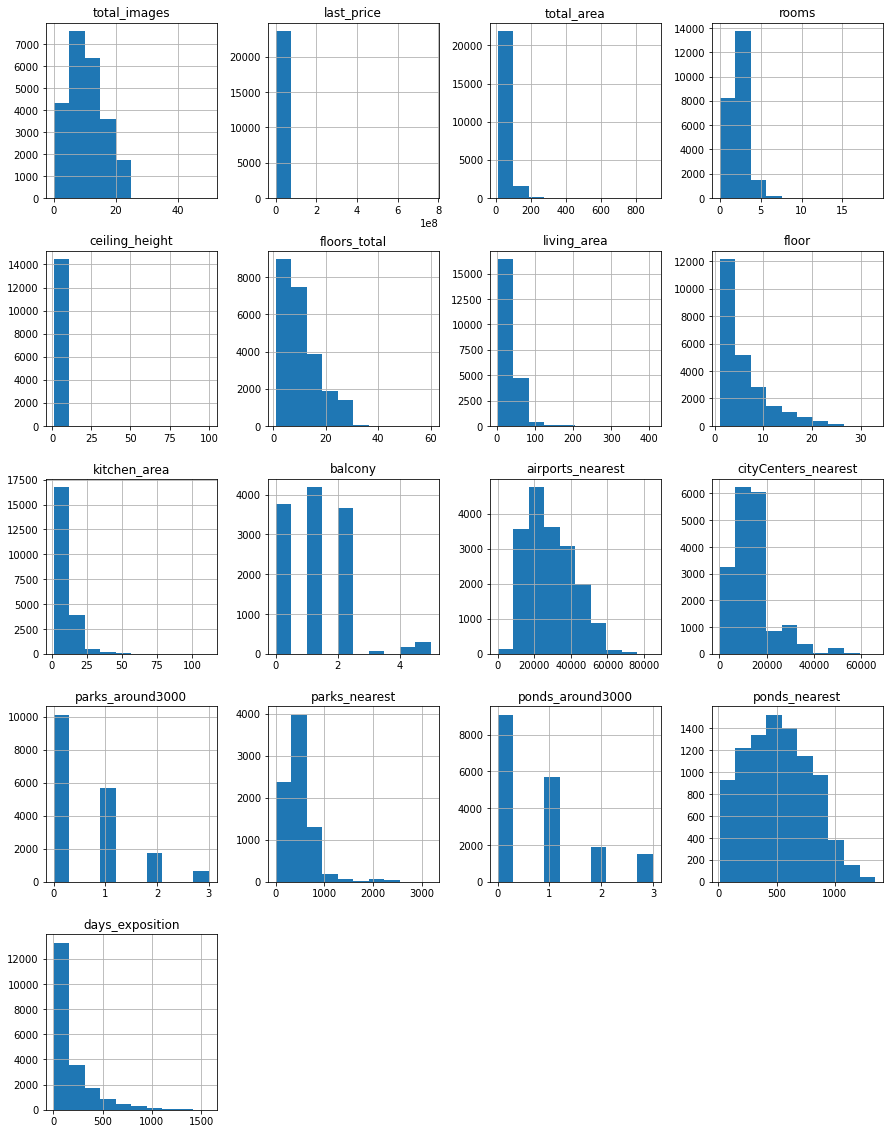

In [4]:
data.hist(figsize=(15, 20))
None

**Можно приступать к предобработке данных, обязательно переименуем необходимые столбцы, чтобы привести их к "правильному" стилю, определим пропущенные значения в столбцах и там, где будет возможно, обработаем их, обязательно еще исправим типы данных.**

### Предобработка данных

<strong>Переименуем столбец "cityCenters_nearest", чтобы название было написано в одном регистре и слова были разделены подчеркиванием</strong>

In [5]:
data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest'}, inplace = True)

<strong>Определим пропущенные значения, посмотрим в каких столбцах они есть </strong>

In [6]:
data.isnull().sum().sum() #общее количество пропущенных значений в датафрейме 

101441

In [7]:
data.isnull().sum() #количество пропущенных значений в каждом столбце

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
(data.isnull().mean() * 100).round()

total_images             0.0
last_price               0.0
total_area               0.0
first_day_exposition     0.0
rooms                    0.0
ceiling_height          39.0
floors_total             0.0
living_area              8.0
floor                    0.0
is_apartment            88.0
studio                   0.0
open_plan                0.0
kitchen_area            10.0
balcony                 49.0
locality_name            0.0
airports_nearest        23.0
city_centers_nearest    23.0
parks_around3000        23.0
parks_nearest           66.0
ponds_around3000        23.0
ponds_nearest           62.0
days_exposition         13.0
dtype: float64

_**Попробуем разобраться с пропусками в каждом столбце и заменим их там, где это возможно**_

* ceiling_height - высота потолков (м): оставим пропущенные значения, логичную замену предложить сложно, как и удалить их - ведь это почти **40% наших данных.** 


* floors_total - количество этажей в доме: пропущенные значения в этом столбце можно объяснить тем, что в доме всего один этаж, либо продавец случайно или намеренно не стал предоставлять эту информацию. Таких значений пропущено совсем немного.   (**< 1% от наших даных.**) Можно их удалить.


* living_area - жилая площадь в квадратных метрах (м²): заменить пропущенные данные не предоставляется возможным, как и удалить их. Ведь это целых **7% наших данных**.


* is_apartment - апартаменты (булев тип): такое большое количество пропущенных значений можно объяснить тем, что это совсем новый вид жилья, **пропущенные значения можно заменить на False**.


* kitchen_area - площадь кухни в квадратных метрах (м²): предложить замену пропущенным данным невозможно, как и удалить их (**это почти 10% наших данных**). И ведь, например,  в квартирах-студиях может и не быть кухни, как и соотвественно ее площади.


* balcony - число балконов: продавец не указал число балконов, вероятнее всего их нет. Пропущенные значения было бы правильно **заменить на 0**.


* locality_name - название населённого пункта: пропущенные значения могли появиться по причине того, что продавец случайно или намеренно не указал эти данные. **Заменим их значением "Не задано"**, для относительного определения географического положения можно использовать данные из других столбцов.


* airports_nearest - расстояние до ближайшего аэропорта в метрах (м), city_centers_nearest - расстояние до центра города (м), parks_around3000 - число парков в радиусе 3 км, parks_nearest - расстояние до ближайшего парка (м), ponds_around3000 - расстояние до ближайшего водоёма (м), ponds_nearest - расстояние до ближайшего водоёма (м): данные в этих столбцах заполнялись автоматически на основе картографических данных, заменить их не проедоставляется возможным. Пропущенные значения в этих столбцах возможно появились из-за технической ошибки или из-за ошибки определения геолокации. Удалить строки с данными пропущенными значениями мы не можем - они занимают большую часть датафрейма (**больше 75%**).


* days_exposition - сколько дней было размещено объявление (от публикации до снятия): пропущенные значения вероятнее всего означают, что объявление всё ещё актуально и размещено. **Оставим  пропущенные значения**.


_**Приступим к изменениям, изложенным выше!**_

<strong>Удалим пропущенные значения в floors_total</strong>

In [9]:
data = data.dropna(subset=['floors_total'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        14495 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21743 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          21382 non-null  float64
 13  balcony               12133 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

<strong>Заменим пропущенные значения в is_apartment на False</strong>

In [10]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].value_counts()

False    23563
True        50
Name: is_apartment, dtype: int64

<strong>Заменим пропущенные значения в balcony на 0</strong>

In [11]:
data['balcony'] = data['balcony'].fillna(0)

<strong>Заменим пропущенные значения в locality_name на параметр "Не задано"</strong>

In [12]:
data['locality_name'] = data['locality_name'].fillna('Не задано')

**Перейдем к изменению типов данных.**

В ходе обработки пропущенных значений мы выяснили, что некоторые из них убрать не получиться, а следовательно преобразовать их типы также не выйдет.

* 'first_day_exposition' - преобразуем к типу 'datetime'. Чтобы мы могли корректно могли манипулировать датой.
* 'last_price', 'floors_total', 'balcony' - преобразуем целочисленному типу. Они не могут быть другого типа.
* 'is_apartment' - сделаем логического типа.

_**Приступим к изменениям, изложенным выше!**_

last_price', 'floors_total', 'balcony' - преобразуем целочисленному типу.

In [13]:
data[['last_price', 'balcony', 'floors_total']] = data[['last_price', 'balcony', 'floors_total']].apply(lambda x: x.astype('int64'))
data[['last_price', 'balcony', 'floors_total']].dtypes

last_price      int64
balcony         int64
floors_total    int64
dtype: object

'is_apartment' - сделаем логического типа.

In [14]:
data['is_apartment'] = data['is_apartment'].astype('boolean')
data['is_apartment'].dtypes

BooleanDtype

'first_day_exposition' - преобразуем к типу 'datetime'

In [15]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                   boolean
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

**Успешно применили все изменения!**

**Изучим уникальные значения в столбце с названиями и устраните яные и неявные дубликаты.**

In [16]:
data.duplicated().sum()

0

**Явных дубликатов в DataFrame не обнаружено**

In [17]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Не задано', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской 

**Видно, что значения 'поселок' и 'посёлок' дублируют значения.
Также есть повторяющиеся значения в названиях объектов местности. 
Исправим это.**

In [18]:
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')
data = data.replace({'locality_name':{'Никольское': 'село Никольское', 'городской посёлок Советский': 'посёлок городского типа Советский', 'городской посёлок Большая Ижора': 'посёлок городского типа Большая Ижора', 'городской посёлок Лесогорский': 'посёлок городского типа Лесогорский', 'посёлок Рябово': 'посёлок городского типа Рябово', 'городской посёлок Мга': 'посёлок городского типа Мга', 'городской посёлок Павлово': 'посёлок городского типа Павлово', 'городской посёлок Назия': 'посёлок городского типа Назия', 'коттеджный посёлок Лесное': 'посёлок Лесное', 'Мурино': 'посёлок Мурино', 'Любань': 'посёлок Любань', 'городской посёлок Рощино': 'посёлок городского типа Рощино', 'деревня Кудрово': 'Кудрово'}})
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Не задано', 'Новая Ладога', 'Отрадное',
       'Павловск', 'Петергоф', 'Пикалёво', 'Подпорожье', 'Приморск',
       'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск',
       'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой',
       'Тихвин', 'Тосно', 'Шлиссельбург', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Новоселье',
       'городской посёлок Свирьстрой', 'городской посёлок Фёдоровское',
       'городской посёлок Янино-1', 'деревня Агалатово', 'деревня Аро',
       'деревня Батово', 'деревня Бегуницы', 'деревня Белогорка',
       'деревня Большая Вруда', 'деревня Большая Пустомержа',
       'деревня Большие Колпаны', 'деревня Бол

**Приступим к столбцу с высотой потолков ceiling_height:**

In [19]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [20]:
data['ceiling_height'].describe()

count    14495.000000
mean         2.771495
std          1.261445
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

**Довольно большой разброс значений, можно увидеть, что минимальное значение высоты 1 метр, а максимальное целых 100. Также стоит обратить внимание на диапазон значений от 20 до 32 метров. Что является очевидным аномальным значением. Вероятнее всего, это вещественные значения: 2-3.2 метра. Нужно поделить такие значения на 10.**

In [21]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10
data['ceiling_height'].describe()

count    14495.000000
mean         2.729578
std          0.319937
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

**Построим диаграмму размаха методом boxplot(), чтобы визуально оценить характеристики распределения**

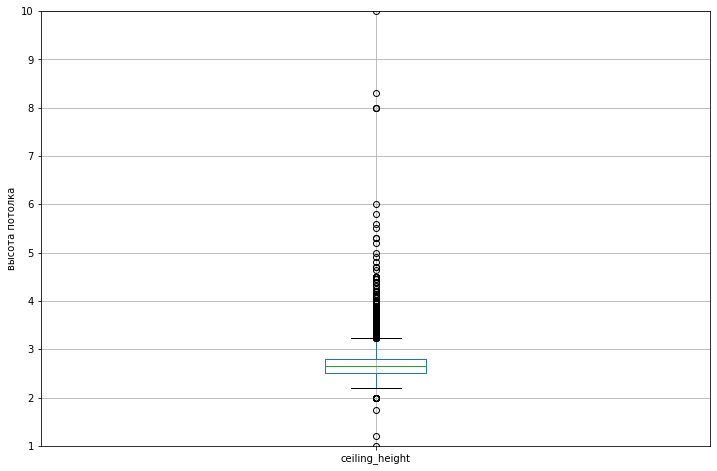

In [22]:
data.boxplot(column='ceiling_height', figsize=(12, 8))
plt.ylim(1, 10)
plt.ylabel('высота потолка')
plt.show()

**Из графика видно, значения менее 2.5 метров и более 2.8 - выбросы, оставим строки с высотой потолков от 2.5 до 5 метров** 

In [23]:
data = data.query('ceiling_height >= 2.5 and ceiling_height <= 5')
data['ceiling_height'].describe()

count    14405.000000
mean         2.727159
std          0.270972
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max          5.000000
Name: ceiling_height, dtype: float64

In [24]:
low_percentele = 0.01
hihg_percentele = 0.99

last_price_low = data['last_price'].quantile(low_percentele)
last_price_high = data['last_price'].quantile(hihg_percentele)

print(f'Нижняя граница last_price {last_price_low}')
print(f'Нижняя граница last_price {last_price_high}')

print(
    'Процент отброшенных значений = ',
    round(
        100 - len(data.query('@last_price_low <= last_price <= @last_price_high'))
        / len(data['last_price']) * 100,
        2
    ),
    '%'
)

Нижняя граница last_price 1150000.0
Нижняя граница last_price 36991999.99999983
Процент отброшенных значений =  1.99 %


Убедимся, что мы потеряли не больше 10% данных. До удаления у нас было в столбце ceiling_height 14495 строк, а после - 14405. Мы избавились от выбросов, которые составляют чуть меньше 1% от наших данных.

**Изучим столбец с количеством этажей floors_total:**

In [25]:
data['floors_total'].describe()

count    14405.000000
mean        10.187851
std          6.205383
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         60.000000
Name: floors_total, dtype: float64

In [26]:
data['floors_total'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 34, 35, 36, 52, 60])

По информации из открытых источников самый высокий жилой дом Петербурга - 35-этажное здание. Удалим строки с количеством этажей больше 35.

In [27]:
data = data.query('floors_total <= 35')
data['floors_total'].describe()

count    14401.000000
mean        10.177904
std          6.175041
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         35.000000
Name: floors_total, dtype: float64

**Мы закончили с предобработкой данных:**
    
* Нашли и изучили пропущенные значения в столбцах, определили, в каких столбцах есть пропуски, где было возможно - заполнили пропущенные значения;

* Рассмотрели типы данных в каждом столбце, нашли столбцы, в которых нужно изменить тип данных и преобразовали их.

* Изучили уникальные значения в столбце с названиями и устранили неявные дубликаты(явных не оказалось вовсе).

* Нашли и устранили редкие и выбивающиеся значения в столбцах, устранили аномалии. 

### Посчитаем и добавим в таблицу новые столбцы

**Добавим в таблицу новые столбцы со следующими параметрами:**
* price_one_square_meter - цена одного квадратного метра;
* posted_day_week - день недели публикации объявления(0 — понедельник, 1 — вторник и так далее);
* posted_month - месяц публикации объявления;
* posted_year - год публикации объявления;
* floor_type - тип этажа квартиры(значения — «первый», «последний», «другой»);
* distance_to_center_kilometers - расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

**price_one_square_meter - цена одного квадратного метра:**

In [28]:
data['price_one_square_meter'] = data['last_price'] / data['total_area']
data.tail(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter
23697,13,11475000,76.75,2017-03-28,2,3.0,17,NaN,12,False,...,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511.400651
23698,4,1350000,32.30,2017-07-21,1,2.5,5,12.3,1,False,...,0,посёлок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41795.665635


**posted_day_week - день недели публикации объявления(0 — понедельник, 1 — вторник и так далее):**

In [29]:
data['posted_day_week'] = data['first_day_exposition'].dt.weekday
data.tail(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,posted_day_week
23697,13,11475000,76.75,2017-03-28,2,3.0,17,NaN,12,False,...,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511.400651,1
23698,4,1350000,32.30,2017-07-21,1,2.5,5,12.3,1,False,...,посёлок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41795.665635,4


**posted_month - месяц публикации объявления:**

In [30]:
data['posted_month'] = data['first_day_exposition'].dt.month
data.tail(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,posted_day_week,posted_month
23697,13,11475000,76.75,2017-03-28,2,3.0,17,NaN,12,False,...,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511.400651,1,3
23698,4,1350000,32.30,2017-07-21,1,2.5,5,12.3,1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41795.665635,4,7


**posted_year - год публикации объявления:**

In [31]:
data['posted_year'] = data['first_day_exposition'].dt.year
data.tail(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,posted_day_week,posted_month,posted_year
23697,13,11475000,76.75,2017-03-28,2,3.0,17,NaN,12,False,...,10364.0,2.0,173.0,3.0,196.0,602.0,149511.400651,1,3,2017
23698,4,1350000,32.30,2017-07-21,1,2.5,5,12.3,1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,41795.665635,4,7,2017


**floor_type - тип этажа квартиры(значения — «первый», «последний», «другой»):**

In [32]:
#функция для определения типа этажа квартиры 
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
        
#добавляем столбец с типом квартиры        
data['floor_type'] = data.apply(floor_type, axis=1)

data.tail(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,posted_day_week,posted_month,posted_year,floor_type
23697,13,11475000,76.75,2017-03-28,2,3.0,17,NaN,12,False,...,2.0,173.0,3.0,196.0,602.0,149511.400651,1,3,2017,другой
23698,4,1350000,32.30,2017-07-21,1,2.5,5,12.3,1,False,...,NaN,NaN,NaN,NaN,NaN,41795.665635,4,7,2017,первый


**distance_to_center_kilometers - расстояние до центра города в километрах (с переводом из м в км и округлением до целых значений)**

In [33]:
data['distance_to_center_kilometers'] = round(data['city_centers_nearest'] / 1000)
data.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,posted_day_week,posted_month,posted_year,floor_type,distance_to_center_kilometers
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37037,3,3,2019,другой,16.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00000,1,6,2018,другой,8.0


**Добавили в таблицу новые столбцы, посчитали их, но из-за пропущенных значений в исходных данных, от которых мы не смогли избавиться в силу разных причин, в получившихся столбцах аналогично появились пропуски.**

### Проведем исследовательский анализ данных

**Изучим и опишем следующие параметры, посторим гистограммы для каждого из них:**
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления

_**Общая площадь и гистрограмма с диаграммой размаха с последующим описанием для этого параметра:**_

count    14401.000000
mean        61.894386
std         36.850615
min         12.000000
25%         41.000000
50%         53.400000
75%         71.400000
max        900.000000
Name: total_area, dtype: float64

Медианное значение: 53.4


<AxesSubplot:>

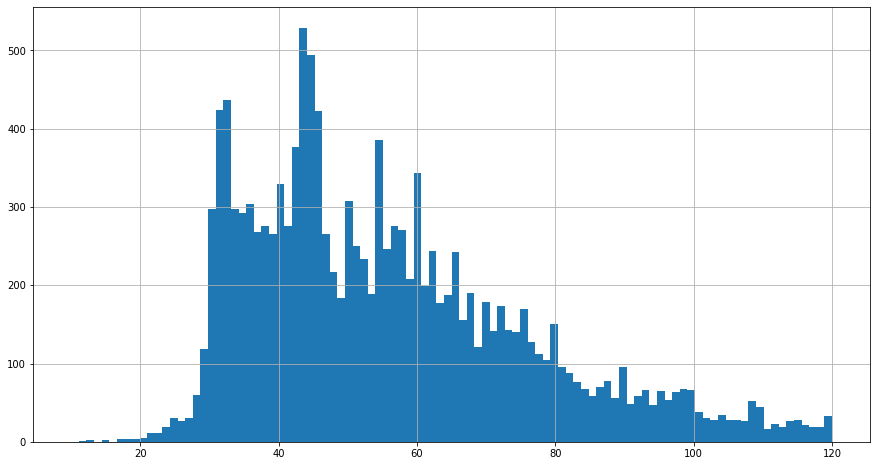

In [34]:
print(data['total_area'].describe())
print()
print('Медианное значение:', data['total_area'].median())
data['total_area'].hist(bins = 100, range = (10,120), figsize = (15,8))

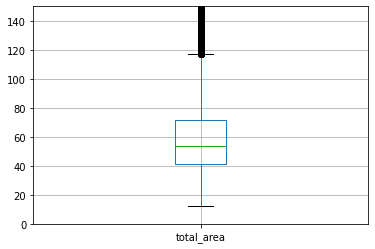

In [35]:
data.boxplot(column='total_area')
plt.ylim(0, 150)
plt.show()

**Можно прийти к выводу, что большая часть квартир варируется площадью от 30 до 80 квадратных метров. Квартиры с площадью более 100 квадратных метров распространены довольно редко, тоже самое можно и сказать про квартиры меньше 30 квадратных метров. Медианное значение почти равно среднему, чем симметричнее распределены значения, тем лучше медиана характеризует среднее значение, в нашем случае можно так сказать.**

_**Жилая площадь и гистрограмма с диаграммой размаха с последующим описанием для этого параметра:**_

count    13615.000000
mean        35.682624
std         22.816579
min          2.000000
25%         19.200000
50%         30.900000
75%         43.300000
max        409.700000
Name: living_area, dtype: float64

Медианное значение: 30.9


<AxesSubplot:>

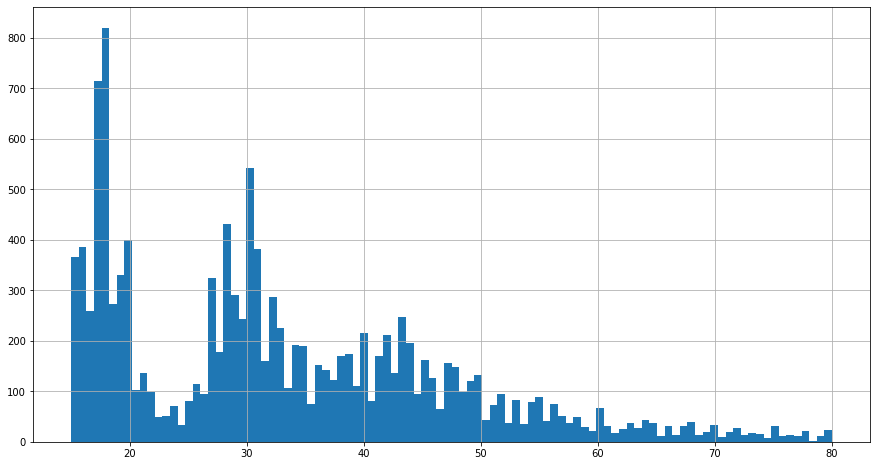

In [36]:
print(data['living_area'].describe())
print()
print('Медианное значение:', data['living_area'].median())
data['living_area'].hist(bins = 100, range = (15,80), figsize = (15,8))

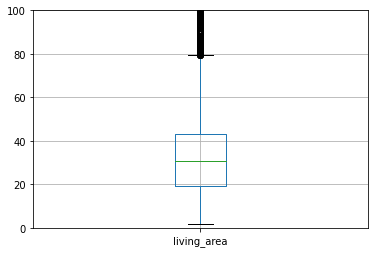

In [37]:
data.boxplot(column='living_area')
plt.ylim(0, 100)
plt.show()

**Можно прийти к выводу, что большая часть квартир варируется жилой площадью от 15 до 35 квадратных метров. Самый частый вариант получается около 15 квадратных метров. Квартиры с жилой площадью более 60 квадратных метров распространены довольно редко, тоже самое можно и сказать про квартиры меньше 15 квадратных метров. Среднее значение - 34 квадратных метра, медиана 30 квадратных метров.**

_**Площадь кухни и гистрограмма с диаграммой размаха с последующим описанием для этого параметра:**_

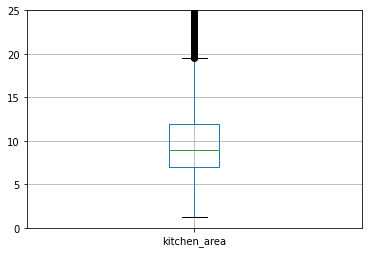

In [38]:
data.boxplot(column='kitchen_area')
plt.ylim(0, 25)
plt.show()

count    13477.000000
mean        10.573148
std          6.038917
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Медианное значение: 9.0


<AxesSubplot:>

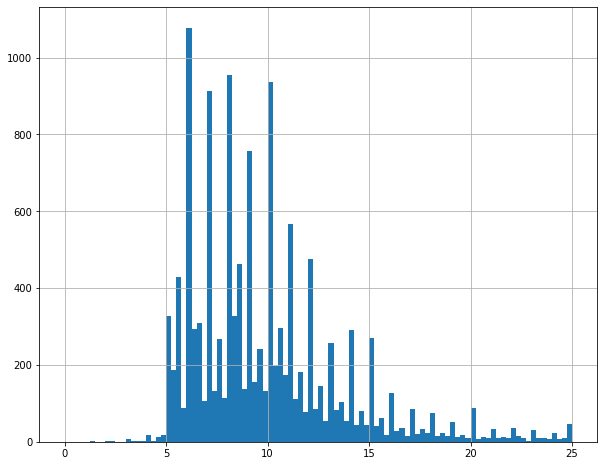

In [39]:
print(data['kitchen_area'].describe())
print()
print('Медианное значение:', data['kitchen_area'].median())
data['kitchen_area'].hist(bins = 100, range = (0,25), figsize = (10,8))

**Можно прийти к выводу, что большая часть площади кухни варируется от 5 до 15 квадратных метров. Самые популярные варианты с площадью кухни чуть более 5 квадратных метров. Варианты с площадью кухни более 15 квадратных метров редко встречаются, тоже самое можно сказать про варианты с площадью меньше 5 квадратных метров. Среднее значение - 10.5 квадратных метров, медианное значение - 9,1 квадратных метра.**

_**Цена объекта и гистрограмма с диаграммой размаха с последующим описанием для этого параметра:**_

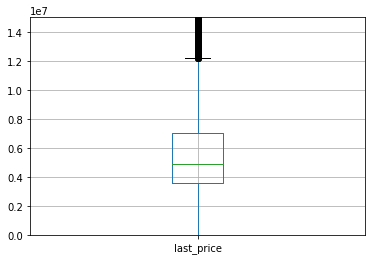

In [40]:
data.boxplot(column='last_price')
plt.ylim(0, 15000000)
plt.show()

count    1.440100e+04
mean     6.822555e+06
std      1.007003e+07
min      1.219000e+04
25%      3.584000e+06
50%      4.860000e+06
75%      7.030000e+06
max      4.200000e+08
Name: last_price, dtype: float64

Медианное значение: 4860000.0


<AxesSubplot:>

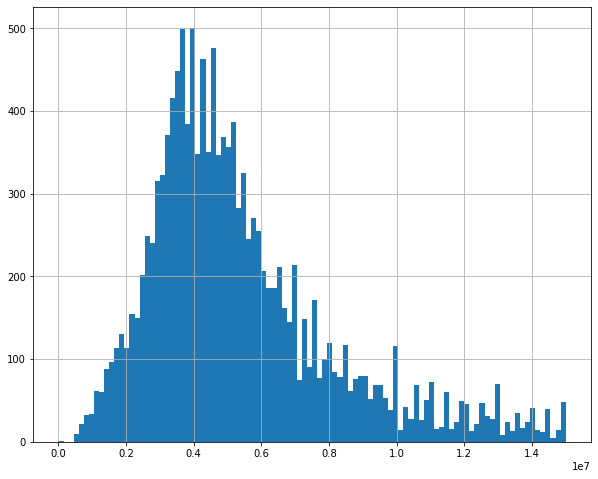

In [41]:
print(data['last_price'].describe())
print()
print('Медианное значение:', data['last_price'].median())
data['last_price'].hist(bins = 100, range = (0, 15000000), figsize = (10,8))

**В большинистве объектов цена изменяется в пределах от 3 до 5 миллионов. Самый популярный вариант в районе 4 миллионов. Среднее значение - 6.5 миллионов, медианное значение- 4.65 миллиона.**

_**Количество комнат и гистрограмма с диаграммой размаха с последующим описанием для этого параметра:**_

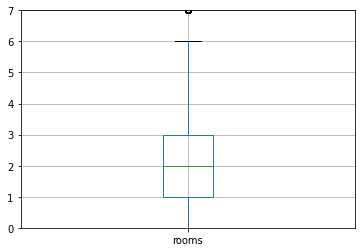

In [42]:
data.boxplot(column='rooms')
plt.ylim(0, 7)
plt.show()

count    14401.000000
mean         2.137629
std          1.099091
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

Медианное значение: 2.0


<AxesSubplot:>

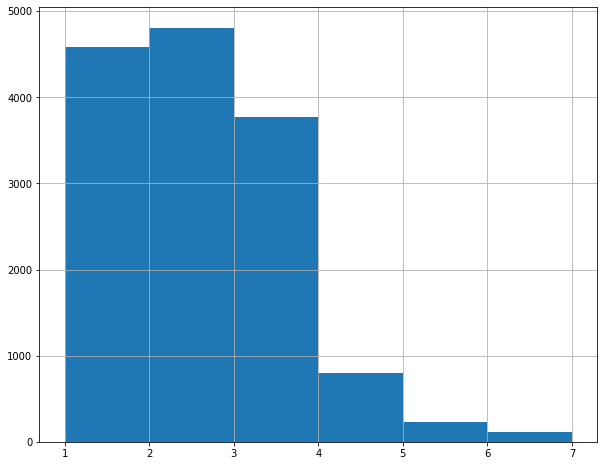

In [43]:
print(data['rooms'].describe())
print()
print('Медианное значение:', data['rooms'].median())
data['rooms'].hist(bins = 6, range = (1,7), figsize = (10,8))

**Большинство жилищных объектов имеют 1 или 2 комнаты, также велико количество трёхкомнатных. Объектов с 4-5 комнатами относительно немного. Среднее и медианное значения 2 комнаты.**

_**Высота потолков и гистрограмма с диаграммой размаха с последующим описанием для этого параметра:**_

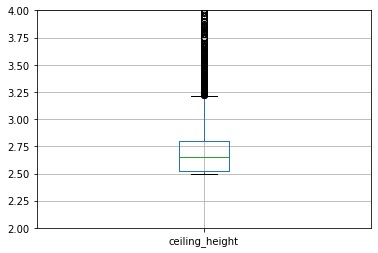

In [44]:
data.boxplot(column='ceiling_height')
plt.ylim(2, 4)
plt.show()

count    14401.000000
mean         2.727157
std          0.271006
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max          5.000000
Name: ceiling_height, dtype: float64

Медианное значение: 2.65


<AxesSubplot:>

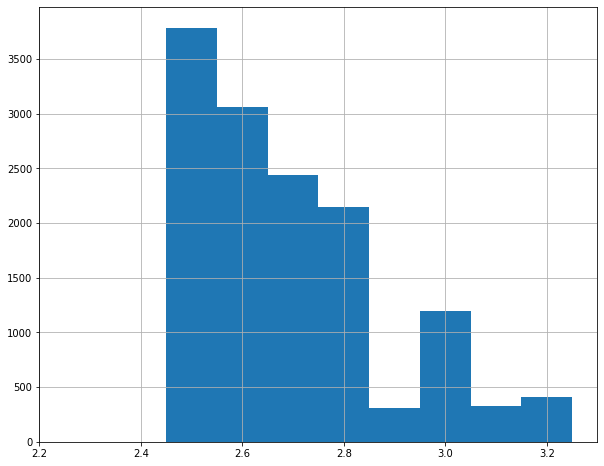

In [45]:
print(data['ceiling_height'].describe())
print()
print('Медианное значение:', data['ceiling_height'].median())
data['ceiling_height'].hist(bins = 10, range = (2.25,3.25), figsize = (10,8))

**Большинство объектов имеют высоту потолков от 2,5 м до 2,8 м. Реже представлены другие варианты. Среднее значение 2.8 метра, медианное - 2.65 метра.**

_**Этаж квартиры и гистрограмма с диаграммой размаха с последующим описанием для этого параметра:**_

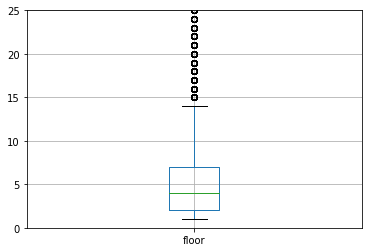

In [46]:
data.boxplot(column='floor')
plt.ylim(0, 25)
plt.show()

count    14401.000000
mean         5.623984
std          4.613935
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         30.000000
Name: floor, dtype: float64

Медианное значение: 4.0


<AxesSubplot:>

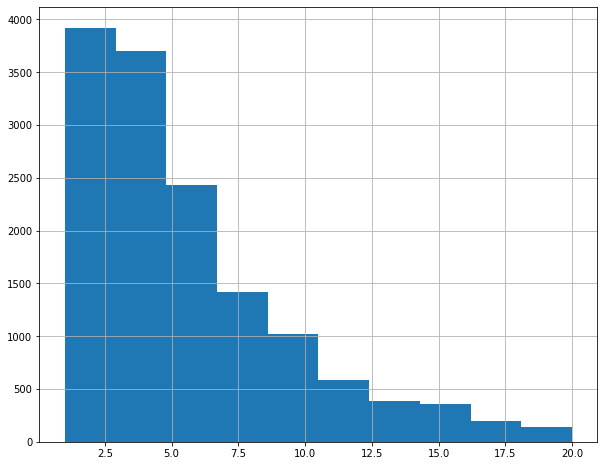

In [47]:
print(data['floor'].describe())
print()
print('Медианное значение:', data['floor'].median())
data['floor'].hist(bins = 10, range = (1,20), figsize = (10,8))

**Большинство объектов находятся с 1 по 4 этаж, чуть реже встречаются варианты с 4 по 7. Среднее значениее - 6 этаж, а медианное - 4.**

_**Тип этажа квартиры и гистрограмма с последующим описанием для этого параметра:**_

<AxesSubplot:>

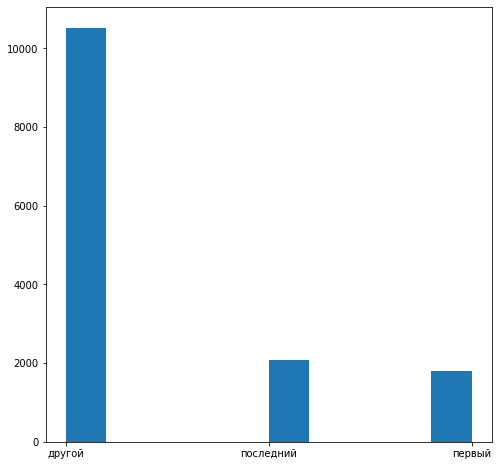

In [48]:
data['floor_type'].hist(bins = 10, figsize = (8,8), grid = False)

**Можно прийти к выводу, что квартиры, расположенные на первом и последним этажах имеют примерно одинаковые значения и их доля невелика. В основном квартиры располагаются между первым и последним этажами**

_**Общее количество этажей в доме и гистрограмма с диаграммой размаха с последующим описанием для этого параметра:**_

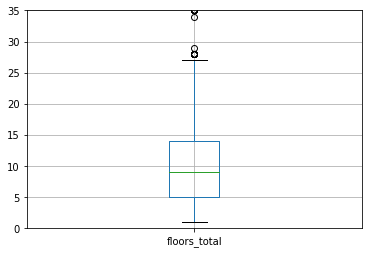

In [49]:
data.boxplot(column='floors_total')
plt.ylim(0, 35)
plt.show()

count    14401.000000
mean        10.177904
std          6.175041
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         35.000000
Name: floors_total, dtype: float64

Медианное значение: 9.0


<AxesSubplot:>

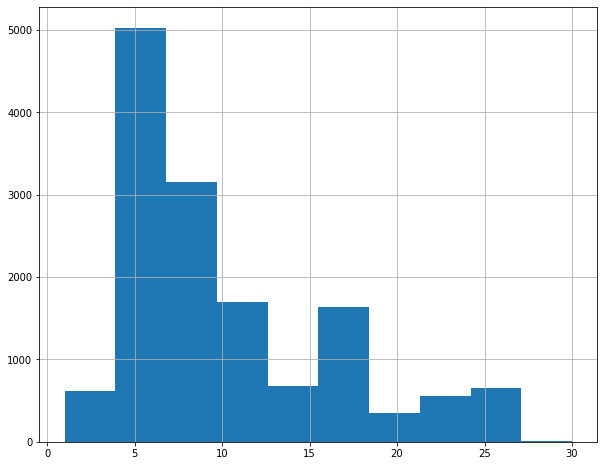

In [50]:
print(data['floors_total'].describe())
print()
print('Медианное значение:', data['floors_total'].median())
data['floors_total'].hist(bins = 10, range = (1,30), figsize = (10,8))

**Можно прийти к выводу, что большинство объектов 5-ти и 9-ти этажные. Остальные варианты встречаются реже. Среднее значение - 10 этажей, медианное - 9 этажей.**

_**Расстояние до центра города в метрах и гистрограмма с диаграммой размаха с последующим описанием для этого параметра:**_

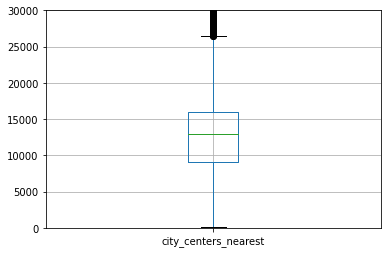

In [51]:
data.boxplot(column='city_centers_nearest')
plt.ylim(0, 30000)
plt.show()

count    11490.000000
mean     14063.680070
std       8757.077034
min        181.000000
25%       9041.000000
50%      12960.000000
75%      16032.750000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Медианное значение: 12960.0


<AxesSubplot:>

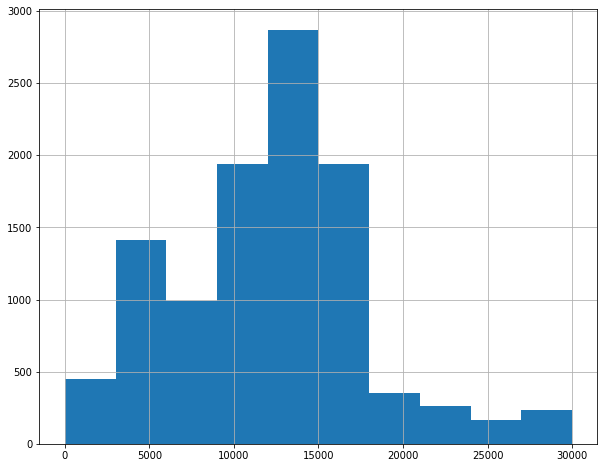

In [52]:
print(data['city_centers_nearest'].describe())
print()
print('Медианное значение:', data['city_centers_nearest'].median())
data['city_centers_nearest'].hist(bins = 10, range = (0,30000), figsize = (10,8))

**Большинство объектов  расположены на расстоянии 13-15 км от центра. Остальные варианты представлены реже. Среднее значение -14 км, медианное - 13 км.**

_**Расстояние до ближайшего аэропорта и гистрограмма с диаграммой размаха с последующим описанием для этого параметра:**_

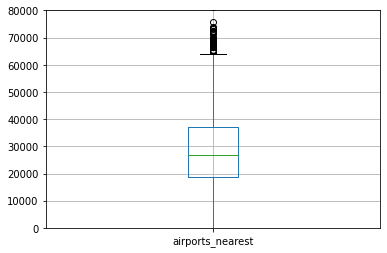

In [53]:
data.boxplot(column='airports_nearest')
plt.ylim(0, 80000)
plt.show()

count    11470.000000
mean     28829.955536
std      12623.053806
min          0.000000
25%      18553.250000
50%      26764.500000
75%      37091.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Медианное значение: 26764.5


<AxesSubplot:>

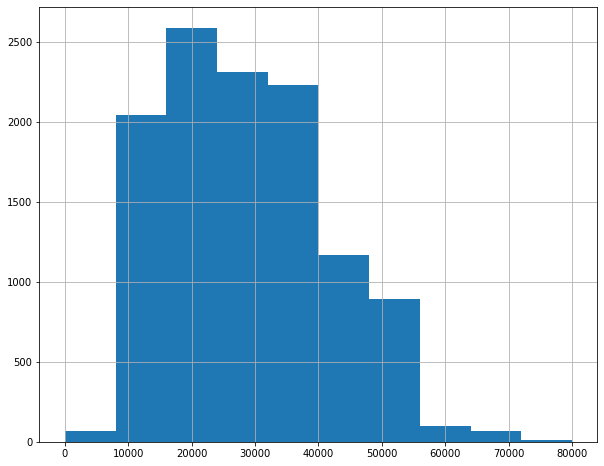

In [54]:
print(data['airports_nearest'].describe())
print()
print('Медианное значение:', data['airports_nearest'].median())
data['airports_nearest'].hist(bins = 10, range = (0, 80000), figsize = (10,8))

**Большинство объектов расположены на расстоянии от аэропорта в 15-25 километров. Среднее значение  28.8 километров, а медианное - 26.7 километров.**

_**Расстояние до ближайшего парка и гистрограмма с диаграммой размаха с последующим описанием для этого параметра:**_

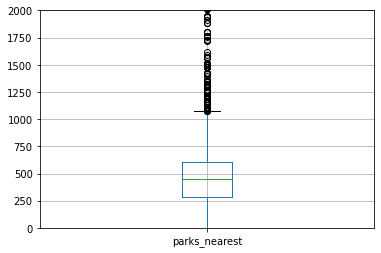

In [55]:
data.boxplot(column='parks_nearest')
plt.ylim(0, 2000)
plt.show()

count    5253.000000
mean      476.849990
std       320.721981
min         3.000000
25%       285.000000
50%       448.000000
75%       602.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Медианное значение: 448.0


<AxesSubplot:>

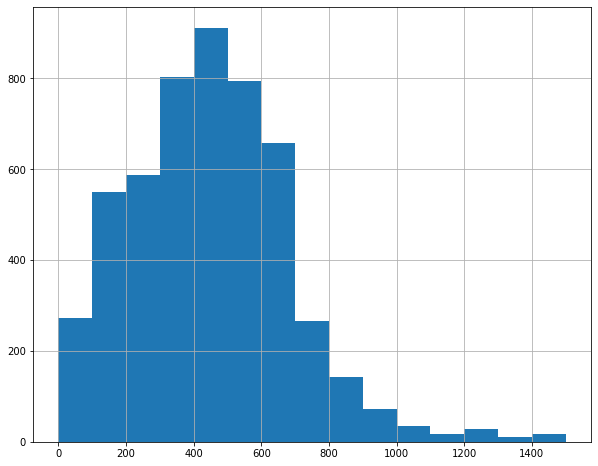

In [56]:
print(data['parks_nearest'].describe())
print()
print('Медианное значение:', data['parks_nearest'].median())
data['parks_nearest'].hist(bins = 15, range = (0, 1500), figsize = (10,8))

**Большинство объектов  расположены на расстоянии от ближайшего парка на расстоянии 200-600 метров. Среднее значение - 476 метров, медианное - 484 метра.**

_**День публикации объявления и гистрограмма с последующим описанием для этого параметра:**_

<AxesSubplot:>

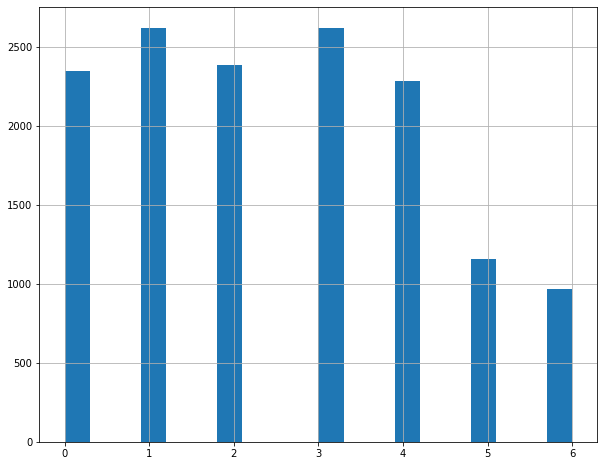

In [57]:
data['posted_day_week'].hist(bins = 20, figsize = (10,8))

**Можно прийти к выводу, что объявление опубликововали чаще в будние дни, чем в выходные**

_**Месяц публикации объявления и гистрограмма с последующим описанием для этого параметра:**_

<AxesSubplot:>

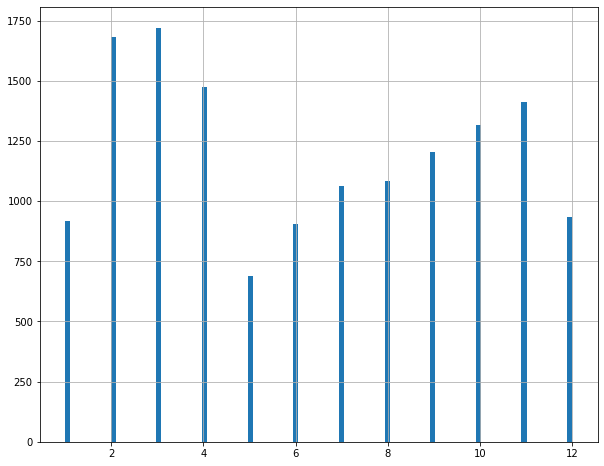

In [58]:
data['posted_month'].hist(bins = 100, figsize = (10,8))

**Можно заметить, что чаще всего объявления опубликововались в феврале и в марте. Наименьшое число публикаций приходится на январь и май. Можно попробовать сделать вывод, что это связано с праздничными днями.**

**Мы изучили и описали параметры, можно сказать, что типичный объект недвижимости будет выглядеть так:**
* 1 или 2 комнаты
* дом 5-ти или 9-ти этажный
* объект преимущеннство распологается с 1 по 4 этаж
* общая площадь около 50 квадратных метров
* площадь кухни около 5 квадратных метров
* высота потолков от 2.5 до 2.8 метров
* стоимость около 3.5 миллионов
* расположение на расстоянии от центра в 13-15 км 
* расположение от аэропорта на расстоянии в 15-25 километров
* расположение до парка около  200-600 метров

**Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление, построим гистограмму, посчитаем среднее и медиану.
Опишим, сколько обычно занимает продажа. Выясним какие продажи можно считать быстрыми, а какие — необычно долгими.**

_**Построим гистограмму и диаграмму размаха для столбца days_exposition:**_

<AxesSubplot:>

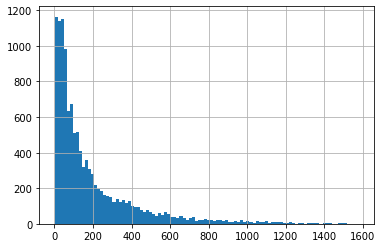

In [59]:
data['days_exposition'].hist(bins = 100)

<AxesSubplot:>

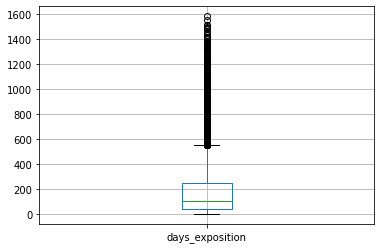

In [60]:
data.boxplot(column = 'days_exposition')

In [61]:
data['days_exposition'].describe()

count    11965.000000
mean       190.534643
std        228.860502
min          1.000000
25%         45.000000
50%        103.000000
75%        248.000000
max       1580.000000
Name: days_exposition, dtype: float64

_**Посчитаем межквартальный размах, чтобы выяснить до какого значения у нас простираются усы на диаграмме размаха, чтобы понять какие данные будут считаться выбросами**_

In [62]:
#межквартальный размах 
q3 = 248
q1 = 45
IQR = q3-q1
print(IQR)

203


In [63]:
bad_data = 1.5*IQR + q3
print(bad_data)

552.5


**Значения, превышающие верхний ус диаграммы размаха больше переменной bad_data. Так что можно считать их выбросами.**

_**Построим нашу гистрограмму заново, игнорируя выбросы:**_

<AxesSubplot:>

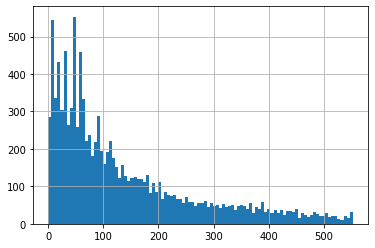

In [64]:
data['days_exposition'].hist(bins = 100, range = (0, 552.5))

На графике видно несколько пиков, но при таком длинном "хвосте" из данных делать выводы не выйдет. Изменим масштаб - изменим период до 100 дней.

<AxesSubplot:>

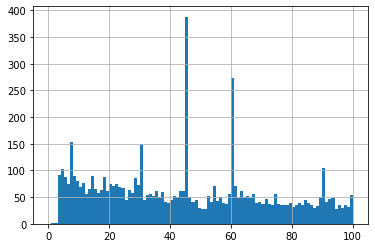

In [65]:
data['days_exposition'].hist(bins = 100, range = (0, 100))

**Можно прийти к выводу, что чаще всего квартиры продаются где-то за 45 и 60 дней.**

_**Посчитаем медиану и среднее значение для столбца days_exposition:**_

In [66]:
data['days_exposition'].describe()

count    11965.000000
mean       190.534643
std        228.860502
min          1.000000
25%         45.000000
50%        103.000000
75%        248.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Среднее значение - 190 дней, медиана - 103 дня, видно, что среднее значение почти вдвое больше медианы, это говорит нам о наличии большего количества вбросов. Максимальное значение - 1580 дней и на первой гистограмме мы действительно наблюдаем длинный "хвост".**

**Вывод:**
* быстрые продажи - до 45 дней 
* нормальные продажи - от 45 до 248 дней
* долгие продажи - от 248  до 552 дней
* выбросы - все, что выше 552 дней
* чаще всего квартиры продаются где-то за 45 и 60 дней

**Выясним факторы больше всего влияют на общую (полную) стоимость объекта. Покажем зависимость цены от указанных ниже параметров:**
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год)

_**Общая площадь:**_

In [67]:
print('Коэффициент корреляции между площадью и стоимостью:', data['total_area'].corr(data['last_price']))

Коэффициент корреляции между площадью и стоимостью: 0.7118788235459983


<AxesSubplot:xlabel='total_area', ylabel='last_price'>

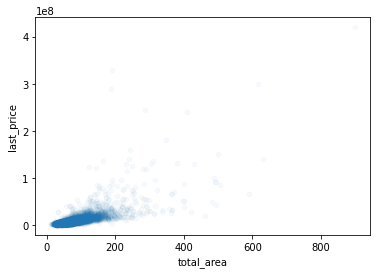

In [68]:
data.plot(x='total_area',y='last_price',kind='scatter', legend=True, alpha = 0.03)

**Коэффициент корреляции близок к единице, он положительный, это говорит о довольно сильной зависимости параметров, с ростом площади растет и цена. Графически это тоже наглядно заметно.**

_**Жилая площадь:**_

In [69]:
print('Коэффициент корреляции между жилой площадью и стоимостью:', data['living_area'].corr(data['last_price']))

Коэффициент корреляции между жилой площадью и стоимостью: 0.6124481072129778


<AxesSubplot:xlabel='living_area', ylabel='last_price'>

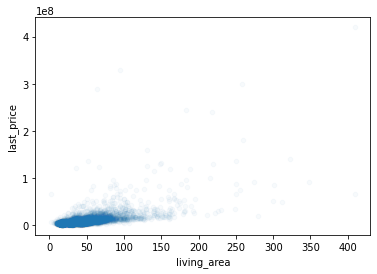

In [70]:
data.plot(x='living_area',y='last_price',kind='scatter', legend=True, alpha = 0.03)

**Коэффициент корреляции близок к единице, он положительный, это говорит о довольно сильной зависимости параметров, с ростом жилой площади растет и цена. Графически это тоже наглядно заметно.**

_**Площадь кухни:**_

In [71]:
print('Коэффициент корреляции между площадью кухни и стоимостью:', data['kitchen_area'].corr(data['last_price']))

Коэффициент корреляции между площадью кухни и стоимостью: 0.5338583313267877


<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

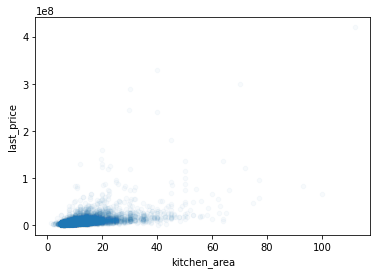

In [72]:
data.plot(x='kitchen_area',y='last_price',kind='scatter', legend=True, alpha = 0.03)

**Зависимость уже меньше, чем в прошлых параметрах, но так же можно сказать, что с ростом площади кухни растет и цена.**

_**Количество комнат:**_

In [73]:
print('Коэффициент корреляции между площадью кухни и стоимостью:', data['rooms'].corr(data['last_price']))

Коэффициент корреляции между площадью кухни и стоимостью: 0.40143813720555915


<AxesSubplot:xlabel='rooms', ylabel='last_price'>

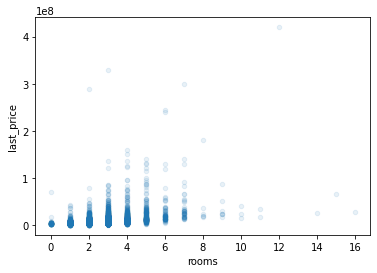

In [74]:
data.plot(x='rooms',y='last_price',kind='scatter', legend=True, alpha = 0.1)

**С увеличением числа комнат до 3 комнат стоимость квартир растет, от 3 до 4 - цена примерно одинаковая, для 5 комнат стоимость снижается. Можно сказать о слабой зависимости параметров.** 

_**Типа этажа, на котором расположена квартира (первый, последний, другой):**_

In [75]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median')

,last_price
floor_type,
другой,5000000
первый,4082500
последний,4550000


**Квартиры, расположенные на первом этаже, стоят ниже, чем те, которые находятся на других или последнем этажах.**

_**Дата размещения (день недели, месяц, год):**_

**Считать корреляцию для категориальных данных не корректно, так как корреляция применима только к линейным зависимостям, зависимость от дня недели, месяца или года не линейна, чаще всего там есть сезонность. Тут лучше построим столбчатую диаграмму по медианам.**

_**День размещения и стоимость**_

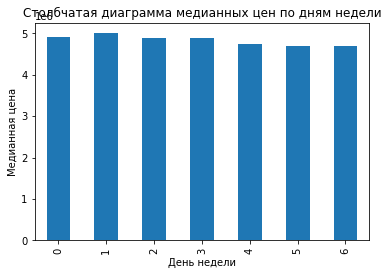

In [77]:
median_prices = data.groupby('posted_day_week')['last_price'].median()
median_prices.plot(kind='bar')
plt.xlabel('День недели')
plt.ylabel('Медианная цена')
plt.title('Столбчатая диаграмма медианных цен по дням недели')
plt.show()

_**Месяц размещения и стоимость**_

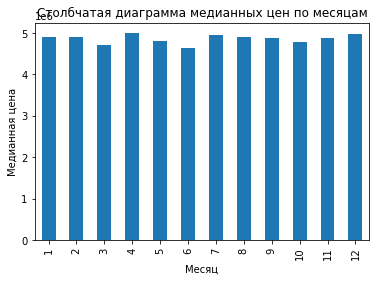

In [78]:
median_prices = data.groupby('posted_month')['last_price'].median()
median_prices.plot(kind='bar')
plt.xlabel('Месяц')
plt.ylabel('Медианная цена')
plt.title('Столбчатая диаграмма медианных цен по месяцам')
plt.show()

_**Год размещения и стоимость**_

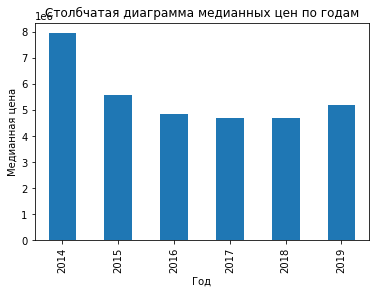

In [79]:
median_prices = data.groupby('posted_year')['last_price'].median()
median_prices.plot(kind='bar')
plt.xlabel('Год')
plt.ylabel('Медианная цена')
plt.title('Столбчатая диаграмма медианных цен по годам')
plt.show()

**Зависимоть между датой размещения объявления по дням, месяцам и стоимостью квартир практически отсутствует. А вот по годам можно сказать, что в 2014 году стоимость продажи была выше.**

**Вывод:**
* На общую (полную) стоимость объекта больше всего влияет общая площадь квартиры, жилая площадь и этаж расположения квартиры. 
* Чем больше площадь, тем выше стоимость. 
* Квартиры на первом этаже дешевле. 
* Зависимоть между датой размещения объявления по дням, месяцам и стоимостью квартир практически отсутствует. А вот по годам можно сказать, что в 2014 году стоимость продажи была выше.

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

_**10 населенных пунктов с большим числом объявлений:**_

In [80]:
top_10 = data['locality_name'].value_counts().head(10)
print(top_10)

Санкт-Петербург      10045
Всеволожск             271
Пушкин                 231
посёлок Мурино         228
посёлок Шушары         216
Колпино                202
Кудрово                194
Гатчина                149
Петергоф               145
посёлок Парголово      136
Name: locality_name, dtype: int64


_**Получим среднюю стоимость квадратного метра по 10 населенным пунктам с большим числом объявлений:**_

In [81]:
top_10_pivot = data.query('locality_name in @top_10.index').pivot_table(index='locality_name', values='price_one_square_meter')
top_10_pivot.sort_values(by='price_one_square_meter', ascending=False)

,price_one_square_meter
locality_name,
Санкт-Петербург,115599.611484
Пушкин,103965.675275
Кудрово,96105.431978
посёлок Парголово,90977.423171
посёлок Мурино,87816.925290
Петергоф,85554.144673
посёлок Шушары,79286.491658
Колпино,75973.424752
Гатчина,69992.693801


Text(0.5, 1.0, 'Средняя цена за квадратный метр')

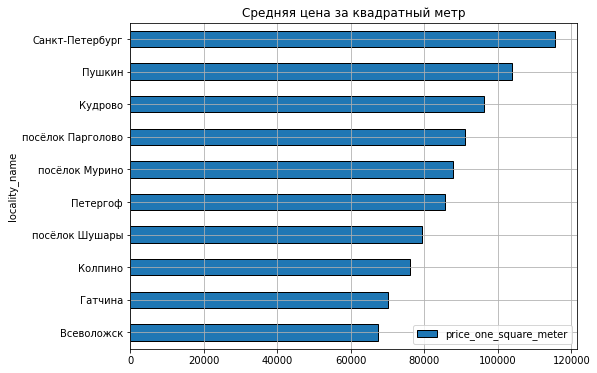

In [82]:
top_10_pivot.sort_values(by='price_one_square_meter').plot(kind='barh', legend=True, grid=True, ec='black', figsize=(8, 6))
plt.title('Средняя цена за квадратный метр')

**Можно прийти к выводу, что что наибольшая средняя цена за 1 квадратный метр в Санкт-Петербурге, что довольно логично - ведь это административный центр. Следом по стоимости идет город Пушкин, что тоже оправдано - много исторических мест, многие объекты недвижимости имеют культурную ценность, много парков и расположение к городу довольно близкое. Наименьшая стоимость за квадратный метр в Всеволожске.**

**Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города.**

In [83]:
data_Saint = data.query('locality_name == "Санкт-Петербург"')
display(data_Saint.head())
print(data_Saint.shape[0])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,posted_day_week,posted_month,posted_year,floor_type,distance_to_center_kilometers
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,другой,15.0
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,310.0,2.0,553.0,137.0,127525.252525,3,11,2017,другой,14.0
16,11,6700000,82.0,2017-11-23,3,3.05,5,55.6,1,False,...,420.0,0.0,NaN,397.0,81707.317073,3,11,2017,первый,11.0


10045


10045 объявлений у нас из Санкт-Петербурга. Определим область центра с помощью стоимости квадратного метра. Построим график. И там, где будет явный спад в стоимости - примем за границы центра.

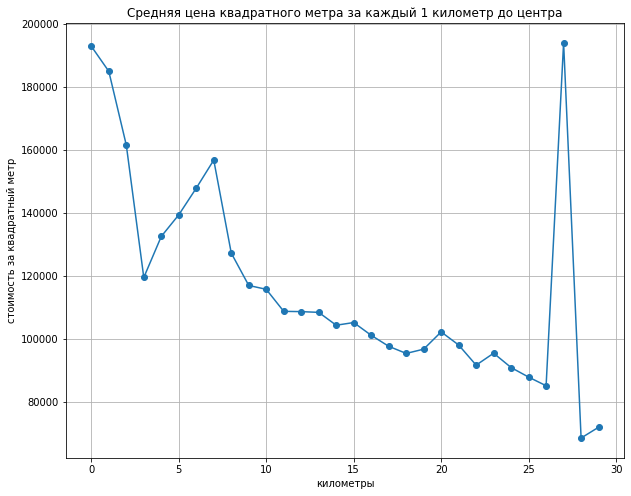

In [84]:
(
data_Saint
    .pivot_table(index='distance_to_center_kilometers', values='price_one_square_meter')
    .plot(marker='o', grid=True, figsize=(10, 8), legend=False)
)
plt.title('Средняя цена квадратного метра за каждый 1 километр до центра')
plt.xlabel('километры')
plt.ylabel('стоимость за квадратный метр')
plt.show()

*Можно прийти к выводу, что после где-то после 8 километра функция становится линейной и стоимость начинается снижаться. Максимальная стоимость в зоне у самого центра(меньше 1 километра). Пик в районе где-то 27 километров - можно попробовать объяснить дорогостоящими объектами высшего класса.*

### Общий вывод

* Изучили общую информацию о полученном датафрейме - изначально в нем 23699 строк, это очень хороший показатель для исследования. 

* Построили общую гистограмму для всех числовых столбцов таблицы. Убедились, что можно приступать к предобработке данных.

* Нашли и изучили пропущенные значения в столбцах: определили, в каких столбцах есть пропуски. Заполнили пропущенные значения там, где это было возможно. К примеру, там, где  продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски заменили на 0. Пропуски — тоже важный сигнал, который нужно учитывать, посчитали в процентах количество пропущенных значений для разных параметров и там где значение было велико - не стали удалять строки.

* Рассмотрели типы данных в каждом столбце: нашли столбцы, в которых нужно изменить тип данных. Преобразовали тип данных в выбранных столбцах. 

* Изучили уникальные значения в столбце с названиями и устранили неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Мы  заменили названия в существующем столбце.

* Нашли и устранили редкие и выбивающиеся значения. Например, в столбце ceiling_height была указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м.Обработали аномалии в этом и других столбцах.

Добавили в таблицу новые столбцы со следующими параметрами для удобства исследования:
   - цена одного квадратного метра;
   - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
   - месяц публикации объявления;
   - год публикации объявления;
   - тип этажа квартиры (значения — «первый», «последний», «другой»);
   - расстояние до центра города в километрах (перевели из м в км и округлили до целых значений).


**Провели исследовательский анализ данных и пришли к следующим выводам:**

**Типичный объект недвижимости будет выглядеть так:**
* 1 или 2 комнаты
* дом 5-ти или 9-ти этажный
* объект преимущеннство распологается с 1 по 4 этаж
* общая площадь около 50 квадратных метров
* площадь кухни около 5 квадратных метров
* высота потолков от 2.5 до 2.8 метров
* стоимость около 3.5 миллионов
* расположение на расстоянии от центра в 13-15 км 
* расположение от аэропорта на расстоянии в 15-25 километров
* расположение до парка около  200-600 метров


**Также выяснили, что:**
- быстрые продажи - до 45 дней
- нормальные продажи - от 45 до 248 дней
- долгие продажи - от 248 до 552 дней
- выбросы - все, что выше 552 дней
- чаще всего квартиры продаются где-то за 45 и 60 дней

* На общую (полную) стоимость объекта больше всего влияет общая площадь квартиры, жилая площадь и этаж расположения квартиры. 
* Чем больше площадь, тем выше стоимость. 
* Квартиры на первом этаже дешевле. 
* Зависимоть между датой размещения объявления по дням, месяцам и стоимостью квартир практически отсутствует. А вот по годам можно сказать, что в 2014 году стоимость продажи была выше.


Наибольшая средняя цена за 1 квадратный метр в Санкт-Петербурге, что довольно логично - ведь это административный центр. Следом по стоимости идет город Пушкин, что тоже оправдано - много исторических мест, многие объекты недвижимости имеют культурную ценность, много парков и расположение к городу довольно близкое. Наименьшая стоимость за квадратный метр в Всеволожске.